<a href="https://colab.research.google.com/github/yango4014/group10/blob/main/Olivia_Yang_Model_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
! git clone https://github.com/yango4014/group10/

fatal: destination path 'group10' already exists and is not an empty directory.


In [ ]:
# original
# R2:  0.08717964343843831
# RMSE:  0.20599583849613765

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.feature_extraction.text import TfidfTransformer


In [192]:
df_train = pd.read_csv("group10/project_2/data/training_data.csv")
df_test = pd.read_csv("group10/project_2/data/testing_data.csv")

In [193]:
df_train.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2465,68685,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked,0
1,4311,59058,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0
2,2375,46068,Male,58.0,0,0,No,Self-employed,Rural,170.93,30.7,Unknown,0
3,5017,36837,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked,0
4,753,30550,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown,0


In [194]:
print(df_train.dtypes)
print(df_test.dtypes)

Unnamed: 0             int64
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
Unnamed: 0             int64
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


<Axes: >

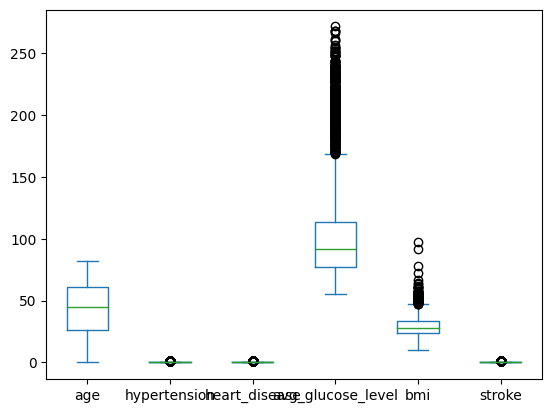

In [195]:
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train = df_train.drop('id', axis=1)
df_test = df_test.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('id', axis=1)
df_train.plot.box()

In [196]:
# Impute missing values for 'bmi'
df_train['bmi'] = df_train['bmi'].fillna(df_train['bmi'].mean())
df_test['bmi'] = df_test['bmi'].fillna(df_test['bmi'].mean())

In [197]:
df_train['avg_glucose_level'] = df_train['avg_glucose_level'].astype(int)
df_train['bmi'] = df_train['bmi'].astype(int)
df_test['avg_glucose_level'] = df_test['avg_glucose_level'].astype(int)
df_test['bmi'] = df_test['bmi'].astype(int)
print(df_train.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level      int64
bmi                    int64
smoking_status        object
stroke                 int64
dtype: object


<ipython-input-198-651c0f815ab5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[x < lower_whisker] = lower_whisker
<ipython-input-198-651c0f815ab5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[x > upper_whisker] = upper_whisker


<Axes: >

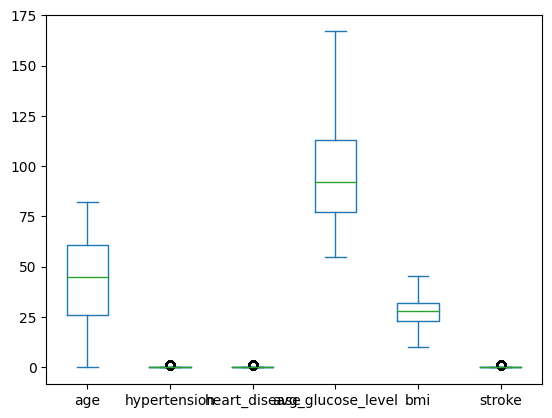

In [198]:
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x, [25, 75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr * 1.5
    upper_whisker = pct75 + iqr * 1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[x < lower_whisker] = lower_whisker
    x_windsor[x > upper_whisker] = upper_whisker
    return x_windsor

df_train['avg_glucose_level'] = windsorize(df_train['avg_glucose_level'])
df_train['bmi'] = windsorize(df_train['bmi'])
df_test['avg_glucose_level'] = windsorize(df_test['avg_glucose_level'])
df_test['bmi'] = windsorize(df_test['bmi'])
df_train.plot.box()

In [199]:
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

In [200]:
## Linear Model
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_train = pd.concat([continuous,dummies],axis=1)

X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_test = pd.concat([continuous,dummies],axis=1)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure

R2:  0.08769067459120017
RMSE:  0.20593816831615852
